In [1]:
data = read.table("subfigs/modisco_compare_baselines/combine_pd_benchmark.csv", sep=",")

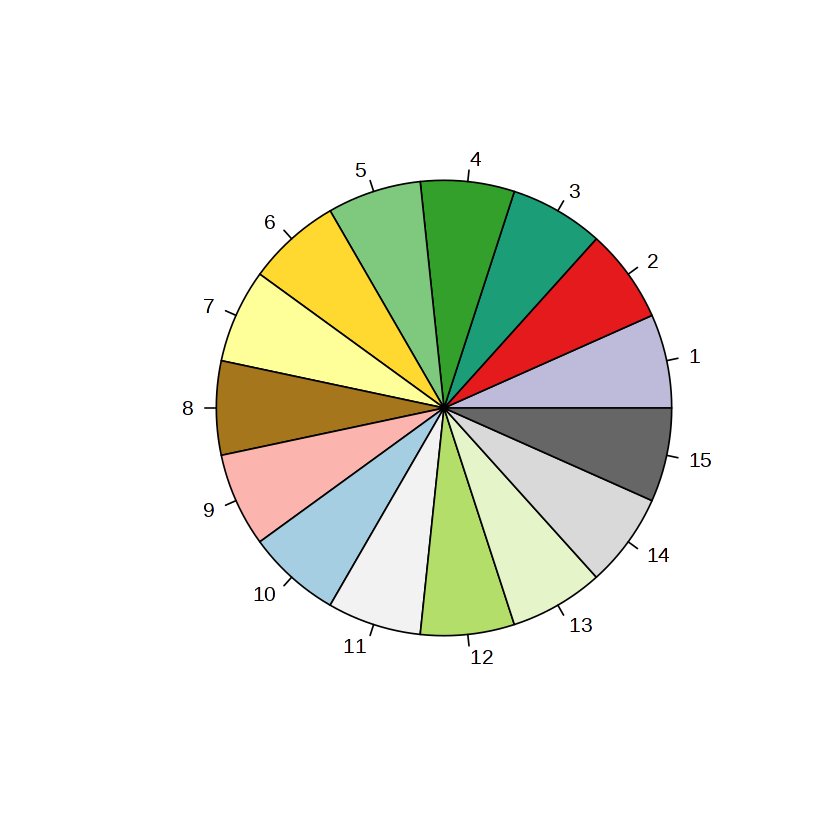

In [2]:
library(RColorBrewer)
n <- 15
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))

In [3]:
merged_new2 = data[data$V2=="ChromBpnet-Counts",]
MotifNames = merged_new2[order(merged_new2$V3, decreasing=TRUE),]$V1
MotifNames = c(MotifNames,c("Tn5", "distorted_motif"))
MotifNames
data$V1 <- factor(data$V1, levels = MotifNames[!duplicated(MotifNames)])

[1] "CTCF"            "IRF4"            "SPI1"            "BATF/JUNB"      
 [5] "IRF4"            "RUNX3"           "RELB"            "SP1"            
 [9] "ELK1"            "RELB"            "NFYA"            "RELB"           
[13] "POU2F2"          "BATF/IRF4"       "NRF1"            "ATF3"           
[17] "Tn5"             "distorted_motif"

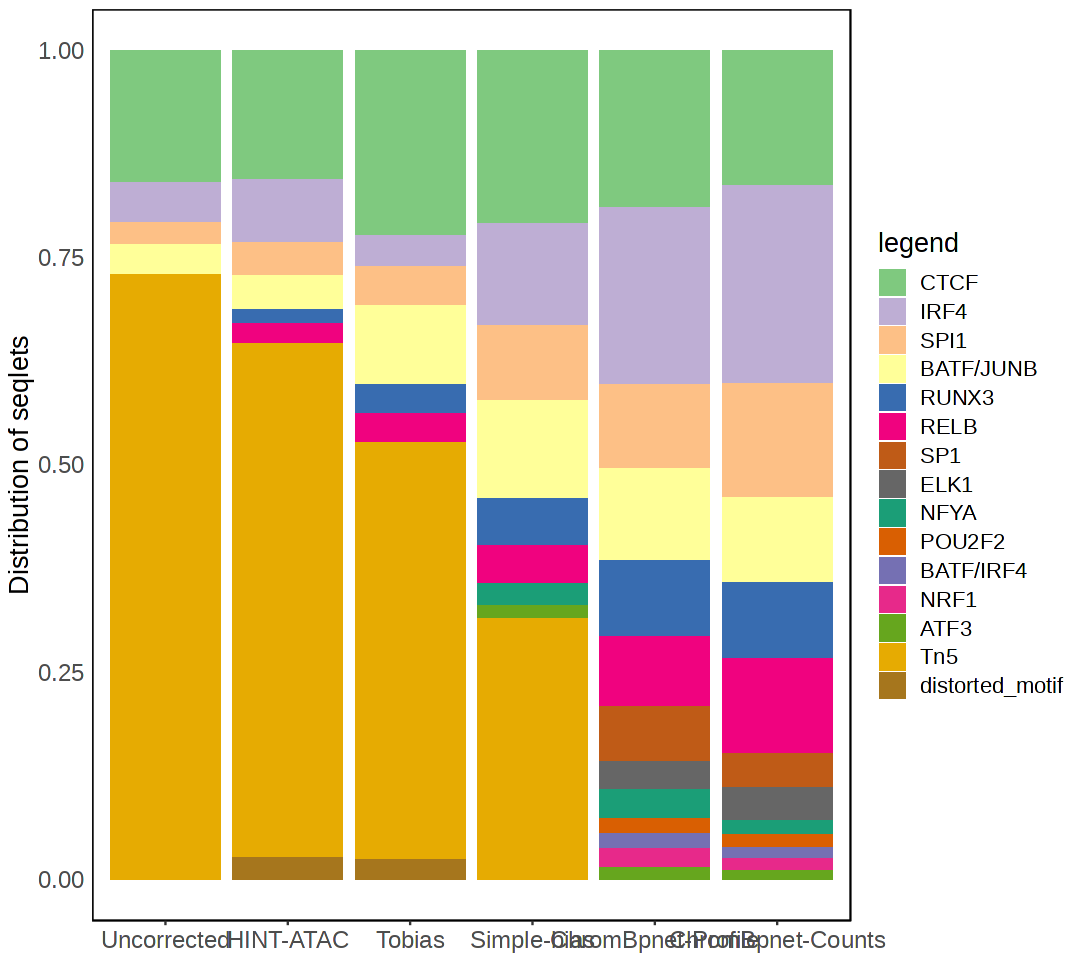

In [6]:
library(ggplot2)
#data
options(repr.plot.width = 9, repr.plot.height = 8)


ggplot(data, aes(x=V2, y=V3, fill=V1)) +
geom_bar(position='fill', stat='identity') +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
    text = element_text(size=16),
    axis.line=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5, size=14),
    axis.text.y = element_text(size=14),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +  scale_x_discrete(limits =c("Uncorrected","HINT-ATAC", "Tobias", "Simple-bias","ChromBpnet-Profile", "ChromBpnet-Counts")) +
scale_fill_manual("legend", values = col_vector) +
ylab("Distribution of seqlets")
ggsave("subfigs/modisco_compare_baselines/modisco_distribution_benchamrking.pdf", width=9, height=8)
